In [64]:
import numpy as np
import pandas as pd
import os
import cv2

In [65]:
path = "D:/Rutu/Summer Internship/UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
100_0_0_20170112213500903.jpg.chip.jpg


In [66]:
images = []
ages = []
genders = []
for file in files:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )

In [67]:
print(genders)

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

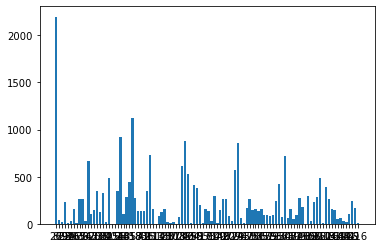

Max value: 99


In [68]:
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(ages))

Gender: 0 Age: 14


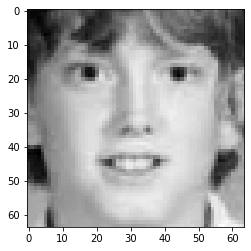

In [69]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 500
sample = images[idx]
print("Gender:",genders[idx],"Age:",ages[idx])
display(sample)

In [70]:
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

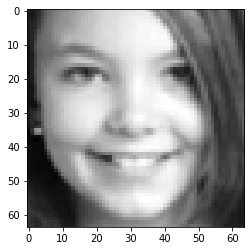

In [71]:
target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 4
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
display(features[550])

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742


In [73]:
print("Shape of image:",sample.shape)

Shape of image: (64, 64, 1)


In [74]:
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

In [75]:
inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='relu')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)

In [76]:
model = Model(inputs=inputs, outputs=[age_model,gender_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [77]:
h = model.fit(x_train,[y_train[:,0],y_train[:,1]],validation_data=(x_test,[y_test[:,0],y_test[:,1]]),epochs = 10, batch_size=128,shuffle = True)

Epoch 1/10
149/149 [==============================] - 129s 854ms/step - loss: 0.8088 - dense_13_loss: 0.1194 - dense_19_loss: 0.6893 - dense_13_accuracy: 0.0122 - dense_19_accuracy: 0.5125 - val_loss: 0.6616 - val_dense_13_loss: 0.0312 - val_dense_19_loss: 0.6304 - val_dense_13_accuracy: 0.0259 - val_dense_19_accuracy: 0.5093
Epoch 2/10
149/149 [==============================] - 136s 912ms/step - loss: 0.6412 - dense_13_loss: 0.0504 - dense_19_loss: 0.5908 - dense_13_accuracy: 0.0199 - dense_19_accuracy: 0.7167 - val_loss: 0.5249 - val_dense_13_loss: 0.0251 - val_dense_19_loss: 0.4998 - val_dense_13_accuracy: 0.0272 - val_dense_19_accuracy: 0.8104
Epoch 3/10
149/149 [==============================] - 140s 940ms/step - loss: 0.5772 - dense_13_loss: 0.0427 - dense_19_loss: 0.5345 - dense_13_accuracy: 0.0229 - dense_19_accuracy: 0.7839 - val_loss: 0.4968 - val_dense_13_loss: 0.0275 - val_dense_19_loss: 0.4693 - val_dense_13_accuracy: 0.0253 - val_dense_19_accuracy: 0.8212
Epoch 4/10
149/1

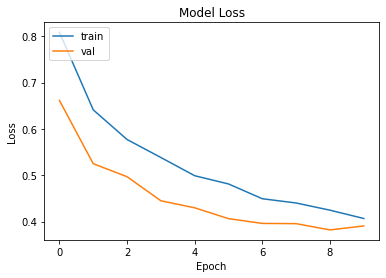

In [78]:
history = h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [95]:
acc = h.history['val_dense_19_accuracy']
print(max(acc))

0.8692534565925598


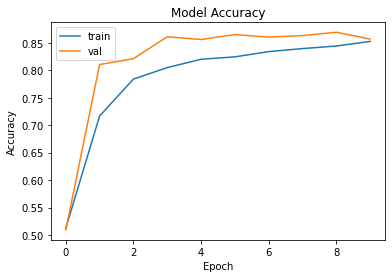

In [80]:
history = h
plt.plot(history.history['dense_19_accuracy'])
plt.plot(history.history['val_dense_19_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

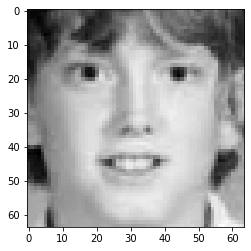

Actual Gender: Male Age: 14
1/1 [==============================] - 0s 108ms/step
Values: [array([[0.42173037]], dtype=float32), array([[0.73768413]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30


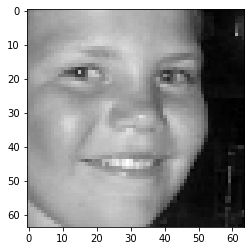

Actual Gender: Male Age: 10
1/1 [==============================] - 0s 21ms/step
Values: [array([[0.4583213]], dtype=float32), array([[0.73768413]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30


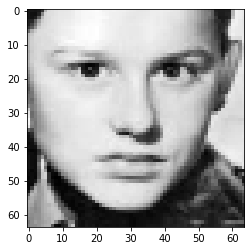

Actual Gender: Male Age: 10
1/1 [==============================] - 0s 26ms/step
Values: [array([[0.42564195]], dtype=float32), array([[0.73768413]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30


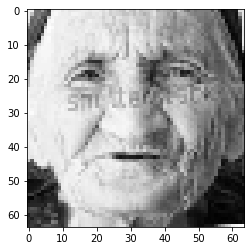

Actual Gender: Female Age: 100
1/1 [==============================] - 0s 37ms/step
Values: [array([[0.69463193]], dtype=float32), array([[0.73768413]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 31-80


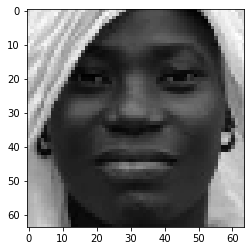

Actual Gender: Female Age: 24
1/1 [==============================] - 0s 31ms/step
Values: [array([[0.6523389]], dtype=float32), array([[0.7294804]], dtype=float32)] 
Predicted Gender: Female Predicted Age: Unknown


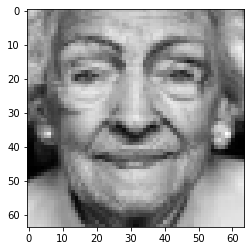

Actual Gender: Female Age: 100
1/1 [==============================] - 0s 20ms/step
Values: [array([[0.747352]], dtype=float32), array([[0.73768413]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 31-80


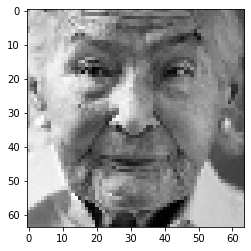

Actual Gender: Female Age: 100
1/1 [==============================] - 0s 17ms/step
Values: [array([[0.7564397]], dtype=float32), array([[0.30807278]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 31-80


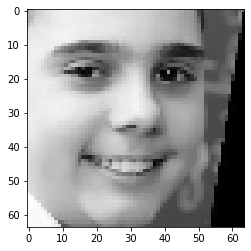

Actual Gender: Male Age: 12
1/1 [==============================] - 0s 34ms/step
Values: [array([[0.43239263]], dtype=float32), array([[0.00093165]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 19-30


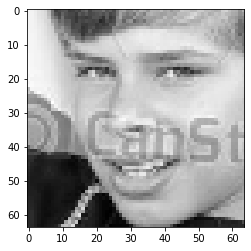

Actual Gender: Male Age: 10
1/1 [==============================] - 0s 33ms/step
Values: [array([[0.47699144]], dtype=float32), array([[0.2793213]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 19-30


In [81]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
    
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

def get_age(distr):
    distr = distr*4
    if distr >= 0.65 and distr <= 1.4:return "0-18"
    if distr >= 1.65 and distr <= 2.4:return "19-30"
    if distr >= 2.65 and distr <= 3.4:return "31-80"
    if distr >= 3.65 and distr <= 4.4:return "80 +"
    return "Unknown"
    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    val = model.predict( np.array([ sample ]) )    
    age = get_age(val[0])
    gender = get_gender(val[1])
    print("Values:",val,"\nPredicted Gender:",gender,"Predicted Age:",age)
    
    
indexes = [500,59,80,2,4546,7,9,256,45]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,precision_score, recall_score,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay

In [83]:
y_pred_gender, y_pred_age = model.predict(features)
y_pred_age = y_pred_age.flatten().astype(int)
y_pred_gender = (y_pred_gender > 0.5).astype(int)

741/741 [==============================] - 31s 42ms/step


In [84]:
print(y_pred_gender)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [85]:
from sklearn.metrics import classification_report
precision, recall, f1_score, _ = classification_report(genders, y_pred_gender, output_dict=True)['1'].values()

In [86]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.4538276162641645
Recall: 0.782097729080145
F1 Score: 0.5743672939649578


In [88]:
mae = mean_absolute_error(ages, y_pred_age)
mse = mean_squared_error(ages, y_pred_age)
print("Mean Absolute Error (MAE):", mae/10)
print("Mean Squared Error (MSE):", mse/100)

Mean Absolute Error (MAE): 3.3303484056014847
Mean Squared Error (MSE): 15.045628058039481


C:\Users\rutur\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\rutur\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


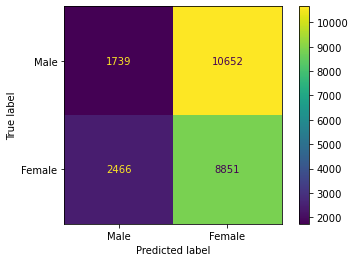

In [92]:
cm_gender = confusion_matrix(genders, y_pred_gender)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_gender, display_labels=["Male", "Female"])
disp.plot()
plt.show()